<center>Заметка 2. Оптимизационная задача.</center>
<center>курса <q>Введение в машинное обучение</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.10</center>

<center>Аннотация</center>
<p>
Поиск "оптимального" решения путем минимизации функционала.
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
%matplotlib inline

<h1>Приближенное решение</h1>

<h2>Минимизация</h2>

Пусть ${\{ (x_i,y_i) \}}_{i=1}^{i=N}$, где N количество данных. При решении задачи регресии (например, линейной) ищется такая функция $f_{a,b}(x)=ax+b$ дабы минимизировать среднеквадротичное отклонение от исходного значения, а именно -- решается задача:
$$
\min_{a,b}\sum_{i=1}^{i=N}(f_{a,b}(x_i) - y_i )^2.
$$
Точнее ищется именно параметр ($a,b$) для которого данный минимум достигается:
$$
a^*, b^* = \underset{a,b}{\operatorname{argmin}}\sum_{i=1}^{i=N}(f_{a,b}(x_i) - y_i )^2.
$$
Последнее показывает важность решения задачи минимизации.

Следует отметить, что в простых случаях, например, как ранее задачу можно решить явно.
Но бывают случаи, когда этого сделать нельзя.

Поэтому, ставится задача о приближенном поиске минимума.
Подразумевается итеративное решение,
т.е. когда приближение к искомому минимумому достигается за некотрое (может и сотни, тысячи) количество шагов.
Так, решение начинается с некоторго $\theta_0$.
Далее,
$$
\theta_{i+1} = G(X, \theta_i).
$$
Обновление $\theta_i$ происходит пока не будет достигнута нужное приближение к минимуму.

<h3>Поиск минимума</h3>

In [2]:
import scipy.optimize as opt

<b>Парабола</b>

Парабола нам хорошо известна.
Например, то что экстремум (минимум/максимум) достигается в середине между корнями.
Поэтому начнем с неё.

In [3]:
def fun(x):
    return (x-5)*(x+11) # x*x + 6x -55
# Корни: 5 и -11. Значит миниум в -3.

In [4]:
sol = opt.minimize( fun, 0, method="CG" )
sol # solution, решение

     fun: -63.999999999999964
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 1
    njev: 3
  status: 0
 success: True
       x: array([-3.0000002])

In [5]:
# Значение аргумента при котором "достигается" (локальный) минимум.
sol.x # Приближенное решение.

array([-3.0000002])

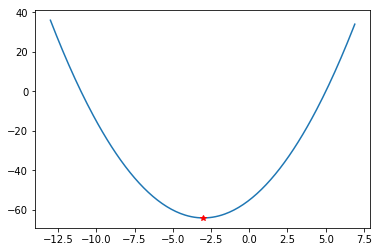

In [6]:
x = np.arange(-13, 7, 0.1)
plt.plot(x, fun(x), sol.x, fun(sol.x), 'r*')
# Отрисуем параболу с найденным минимумом.

In [7]:
# Для отображения информации связанной со сходимостью нужно указать дополнительный параметр
sol = opt.minimize( fun, 0, method="CG", options = {'disp':True} )
# Будет напечатана дополнительная информация.

Optimization terminated successfully.
         Current function value: -64.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3


Iterations - Сколько в итоге было итераций.
Current function value - Значение функции в последней точке.
С точки зрения производительности важны:
Function evaluations - Сколько раз было вычисленно значение функции.
Gradient evaluations - Сколько раз был вычислен градиаент.

Наша функция очень простая, поэтому и минимум был найден за один шаг.
Усложним функцию.

<b>Полином четвертой степени</b>

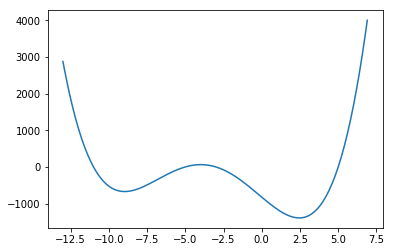

In [8]:
def fun2(x):
    return (x-5)*(x+11)*(x+5)*(x+3) # x*x + 6x -55

x = np.arange(-13, 7, 0.1)
plt.plot(x, fun2(x))

In [9]:
sol = opt.minimize( fun2, 0, method="CG", options = {'disp':True} )

Optimization terminated successfully.
         Current function value: -1392.564272
         Iterations: 5
         Function evaluations: 39
         Gradient evaluations: 13


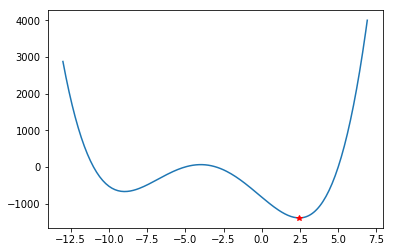

In [10]:
x = np.arange(-13, 7, 0.1)
plt.plot(x, fun2(x))
plt.plot(sol.x, fun2(sol.x), 'r*')

Теперь мы видим, что было 5 шагов. И вычисления подросли.

Как вывести промежуточные шаги.
Это может быть интересно с точки зрения понимания что происходит при поиске минимума.
И когда минимум будет плохо искаться увидеть наглядно в чем затык.

In [11]:
def printx(x):
    print(x)

opt.minimize( fun2, 0, method="CG", callback = printx );

[2.23596463]
[2.43404495]
[2.44736661]
[2.44954084]
[2.44955921]


In [12]:
steps = []
def savex(x):
    steps.append(x[0])

sol = opt.minimize( fun2, 0, method="CG", callback = savex )
steps = np.array(steps)

In [13]:
labels = list(map(str,range(1,len(steps)+1)))
labels

['1', '2', '3', '4', '5']

In [14]:
pnts = list(zip(steps,fun2(steps)))
pnts # Вычислим значение в точках итерации.

[(2.23596463167933, -1386.0928830542748),
 (2.434044953172843, -1392.5290073297645),
 (2.4473666094713526, -1392.563566390497),
 (2.449540835296399, -1392.5642722397167),
 (2.449559214909005, -1392.5642722893724)]

In [15]:
lpnts = list(zip(labels, pnts))
lpnts # Объединим вместе.

[('1', (2.23596463167933, -1386.0928830542748)),
 ('2', (2.434044953172843, -1392.5290073297645)),
 ('3', (2.4473666094713526, -1392.563566390497)),
 ('4', (2.449540835296399, -1392.5642722397167)),
 ('5', (2.449559214909005, -1392.5642722893724))]

In [16]:
dpnts = np.array( pnts )
dpnts.T

array([[    2.23596463,     2.43404495,     2.44736661,     2.44954084,
            2.44955921],
       [-1386.09288305, -1392.52900733, -1392.56356639, -1392.56427224,
        -1392.56427229]])

In [17]:
# Два аргумента.
np.power(2,3)

8

In [18]:
arg = [2,3]
np.power( *arg ) # Распаковка аргумента.

8

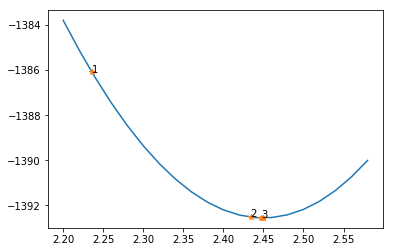

In [19]:
x = np.arange(2.2, 2.6, 0.02)
plt.plot(x, fun2(x))
plt.plot( *dpnts.T, '*' ) # Распакова отдельных точек.
#plt.plot( dpnts[:,0], dpnts[:,1], '*' ) # Так без распаковки.
p=list(map( lambda d: plt.annotate(d[0], d[1]), lpnts[0:3] ));

<b>Не только полнином!</b>

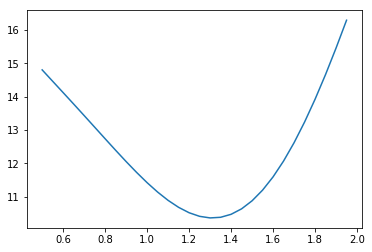

In [20]:
def fun3(x):
    return (x-2)**4 + (x+2)**2 + x + np.sin(x*3)*3 # x*x + 6x -55
x = np.arange(0.5, 2, 0.05)
plt.plot(x, fun3(x))

In [21]:
steps=[]
sol = opt.minimize( fun3, 0, method="CG", callback = savex  )
steps = np.array(steps)

In [22]:
labels = list(map(str,range(1,len(steps)+1)))
pnts = list(zip(steps,fun3(steps))) # fun3!
lpnts = list(zip(labels, pnts))
dpnts = np.array( pnts )

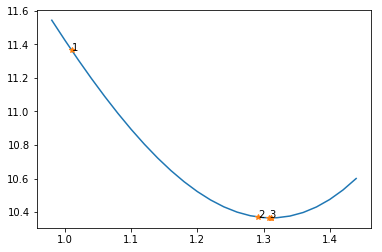

In [23]:
x = np.arange(0.98, 1.45, 0.02)
plt.plot(x, fun3(x))
plt.plot( *dpnts.T, '*' ) # Распакова отдельных точек.
#plt.plot( dpnts[:,0], dpnts[:,1], '*' )
p=list(map( lambda d: plt.annotate(d[0], d[1]), lpnts[0:3] ));

Увеличим масштаб.

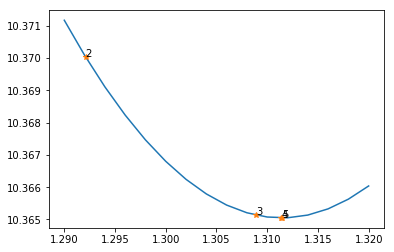

In [24]:
x = np.arange(1.29, 1.32, 0.002)
plt.plot(x, fun3(x))
plt.plot( *dpnts[1:].T, '*' ) # Распакова отдельных точек.
#plt.plot( dpnts[:,0], dpnts[:,1], '*' )
p=list(map( lambda d: plt.annotate(d[0], d[1]), lpnts[1:] ));

График похож, но на самом деле это увеличение возле экстремума. Оно должно быть "впукло", т.е. яма.
А ямы похожи друг на друга.
Смотрим на ост X.

In [ ]:
def dfun(x):
    return 2*x+6

<b>Поиск нулей</b>

Будем искать минимум там, где производная равна нулю.

In [ ]:
# Там где 0
opt.newton(fun, 0, dfun)

<h2>Двумерный случай</h2>

<h3>Отрисовка графики</h3>

По аналогии с одномерным случаем покажем как отрисовывать функции от двух переменных, т.е. 3-хмерные графики.

In [25]:
# Нужно только для того, чтобы 3d графика заработала.
from mpl_toolkits.mplot3d import Axes3D
# т.е. да, сам Axes3D не будет использован.

<b>Кривая</b>

Полным аналогом plot в 3трехмерном пространстве является тоже функция plot.
Она отвечает за отрисовку одномерной кривой.
Так, по аналогии с двумерным графиком функции подаются точки в прострастве которые нужно соеденить подряд.
Токчи задаются тремя списками.

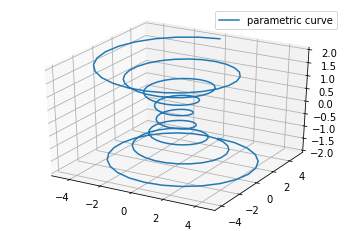

In [26]:
plt.gca(projection='3d') # Вклюаем 3хмерный режим 

theta = np.linspace(-8 * np.pi, 8 * np.pi, 200)
z = np.linspace(-2, 2, 200)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

plt.plot(x, y, z, label='parametric curve')
plt.legend();

Трехмарность обеспечена вызовом plt.gca(projection='3d').
Функции plot были переданы три списка: x, y, z.

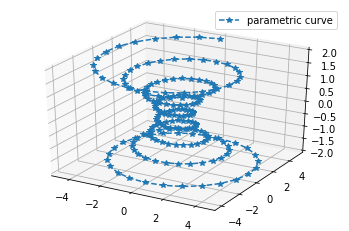

In [27]:
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, '*--',label='parametric curve')
plt.legend();# Стиль отрисовки кривой задается таким же образом как и для двумерных графиков.

In [28]:
x1 = z*z/2 + 2 *z - 5
y1 = z - 1

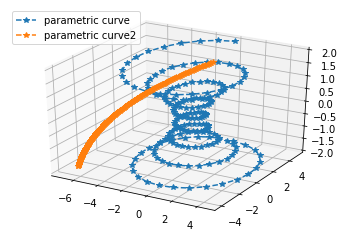

In [29]:
# Можно и две кривые на одном графике.
plt.gca(projection='3d') # Вклюаем 3хмерный режим 
plt.plot(x, y, z, '*--',label='parametric curve')
plt.plot(x1, y1, z, '*--',label='parametric curve2')
plt.legend();# Стиль отрисовки кривой задается таким же образом как и для двумерных графиков.

<b>Поверхность</b>

Для создание поверхности нам нужно задать сетку и значение функции в каждом узле данной сетки.
Сетка задается прямоугольником: отсечками вдоль одной и дрйгой оси (X и Y).

In [30]:
# Сетки принято делать с равномерным шагом и совпадающим шагов вдоль каждой из осей.
X = [5, 7, 9, 11] # Отсечки вдоль оси X.
Y = [3, 5, 7] # Отсечки вдоль оси y.

Сетку можно визуализировать так:

(4.7, 11.3, 2.8, 7.2)

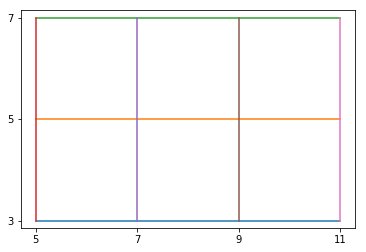

In [31]:
list( map( lambda y:plt.plot( X, [y]*len(X) ), Y ));
list( map( lambda x:plt.plot( [x]*len(Y), Y ), X ));
plt.xticks(X)
plt.yticks(Y)
plt.axis('equal')

Теперь необходимо получить координаты пересечения.

В качестве упражнения получити их самостоятельно через map или цикл for.

In [32]:
# Есть готовая функция:
grid_x, grid_y = np.meshgrid(X, Y)

In [33]:
grid_x # Значения x-ой координаты точек сетки.
# Видно, что размер матрицы соответствует ранее нарисованной сетки.

array([[ 5,  7,  9, 11],
       [ 5,  7,  9, 11],
       [ 5,  7,  9, 11]])

In [34]:
grid_y # Аналогично с координатой y.

array([[3, 3, 3, 3],
       [5, 5, 5, 5],
       [7, 7, 7, 7]])

In [35]:
i, j = 1, 2 # Индексы как в матрице.
# Иначе говоря координаты узла с индексом i,j задается как
grid_x[i][j], grid_y[i][j]
# Отмечу, что индекс i является строчкой матрицы,
# а индекс j -- столбцом матрцы.
# Координаты же задаются как обычно: вдоль осей x и y.

(9, 5)

(4.7, 11.3, 2.8, 7.2)

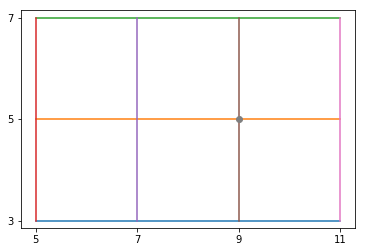

In [36]:
list( map( lambda y:plt.plot( X, [y]*len(X) ), Y ));
list( map( lambda x:plt.plot( [x]*len(Y), Y ), X ));
plt.xticks(X)
plt.yticks(Y)
plt.plot( grid_x[i][j], grid_y[i][j], 'o' ) # Отметим данный узел.
plt.axis('equal')

In [37]:
Z = np.abs(grid_x-8) + np.abs(grid_y-5)
Z

array([[5, 3, 3, 5],
       [3, 1, 1, 3],
       [5, 3, 3, 5]])

In [38]:
Z.shape # По размеру матрицы зачений видно что она соответствует сетки.

(3, 4)

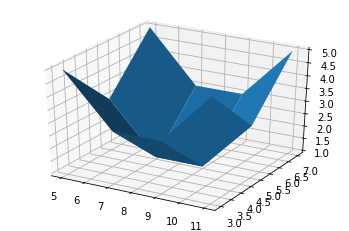

In [39]:
ax = plt.gca(projection='3d') # Вклюаем 3хмерный режим 

# Отрисовываем поверхность.
surf = ax.plot_surface(grid_x, grid_y, Z ) #, cmap=cm.coolwarm, linewidth=0, antialiased=False)

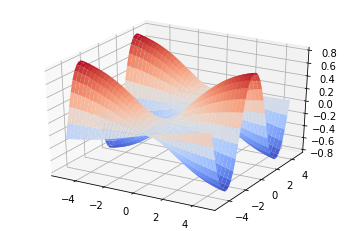

In [40]:
from matplotlib import cm
ax = plt.gca(projection='3d') # Вклюаем 3хмерный режим 
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sin(X/4)*np.cos(Y)
Z = np.sin(R)

# Отрисовываем поверхность.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)


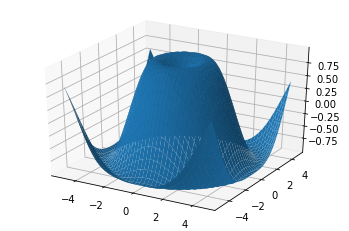

In [41]:
ax = plt.gca(projection='3d') 

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Отрисовываем поверхность.
surf = ax.plot_surface(X, Y, Z) 

<h3>Оптимизация</h3>

In [42]:
def fun2(x):
    return (x[0]-5)**2*(x[1]-7)**2

#def funff(x):
#    return ( (x[0]*x[2]-3)**2 + (x[0]*x[3]-4)**2 + (x[1]*x[2]-6)**2 + (x[1]*x[3] - 8)**2  )

In [43]:
grid = np.stack( [X, Y])
grid.shape

(2, 40, 40)

In [44]:
Z = fun2( grid )
Z.shape

(40, 40)

In [45]:
Z[3,3]

10829.00390625

In [46]:
X[3,3], Y[3,3]

(-4.25, -4.25)

In [47]:
fun2( [4.75, 6.75] )

0.00390625

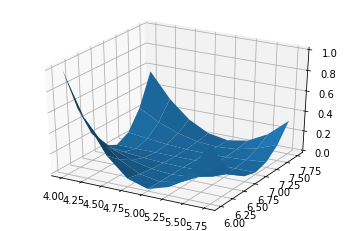

In [48]:
ax = plt.gca(projection='3d') 

X = np.arange(4, 6, 0.25)
Y = np.arange(6, 8, 0.25)
X, Y = np.meshgrid(X, Y)
grid = np.stack( [X, Y])
Z = fun2( grid )
surf = ax.plot_surface(X, Y, Z) 

In [49]:
opt.minimize( fun2, (0,0) )

      fun: 6.6642288495411575e-15
 hess_inv: array([[ 0.00431369, -0.00612637],
       [-0.00612637,  0.01655505]])
      jac: array([-3.06889447e-08, -1.23806883e-15])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([ 4.99999999, -3.76552257])

In [ ]:
#ans = opt.minimize( funff, (2,1,1,-1) )
#ans

In [ ]:
#ans.x[2]/ans.x[3]

<h2>Регуляризация</h2>

<b>Сформируем данные</b>

In [50]:
x = np.linspace(10, 20, 5)

In [51]:
y = x * 2 - 15

In [52]:
yy = y + np.random.randn(5) # Добавим шум к каждому значению (измерению)

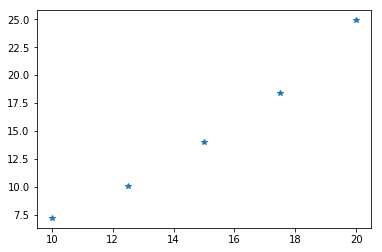

In [53]:
plt.plot( x, yy, '*' ) # Кривая как-то странно выглядит.

In [54]:
# -5 + 5x
d = np.array( [-5, 5] ) # Параметры задающие линию.

In [55]:
poly.polyval( 0, d ), poly.polyval( 2, d )

(-5.0, 5.0)

In [56]:
# Значение в точки с индексом 1.
poly.polyval( x[1], d )

57.5

In [57]:
# Значение во всех точках.
poly.polyval( x, d )

array([45. , 57.5, 70. , 82.5, 95. ])

Допустим у нас есть кандидат на линейное уравнение.
Как вычислить среднеквадратичную ошибку?

In [58]:
# Квадрат отклонения от правильного ответа в каждой точки.
err = (poly.polyval( x, d ) - y)**2

In [59]:
# Среднеквадратичное отклонение:
np.mean( err )

3137.5

In [60]:
# По параметрам прямой (d) и точкам (x,y) вычислим общую ошибку.
# Отмечу, что точки (x,y) в функцию не передаются. Они глобальны по отношению к ней.
def errLine(d):
    err = (poly.polyval( x, d ) - y)**2 # Ошибка на прямой d.
    return np.mean( err )

In [61]:
opt.minimize( errLine, (-5,4), method="CG" )

     fun: 2.1911050158702597e-13
     jac: array([1.57485331e-09, 2.95533678e-08])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 3
    njev: 8
  status: 0
 success: True
       x: array([-14.99999802,   1.99999987])

Теперь можно использовать любую ошибку.

Упр. Сведите все вместе. Применb идеалогию машинного обучения:
    а) случайное разбиение данных на "обучающие" и "проверочные", б) подбор параметров функции по "обучающим" данным, в) оценка делается по тестовым даным,  г) интегральная оценка вычисляется как средняя ошибка по случайным разбиениям.
    Выбирите несколько функций приближения (например, приближение линейной, квадратичной, кубической, но можно и гораздо изошренее) и посчитайте среднею ошибку на случайных выборках. Та функция, на которой наилучший результат и считается искомой с точки зрнеия машинного обучения.

<b>Функтор</b>

Как мы ранее видели, функция котрую мы минимизировали использовала глобальные переменные,
т.е. переменные которые ей не передавались как аргумент.
Такой подход негодится в большом объеме кода.

Как сделать иначе? Как сделать так, чтобы к функции были "привязаны" данные?

In [62]:
# Делается это посредстовм класса у которого есть специальные метод __call__.
# Последний и имеет полный аналог функции, но раз это метод,
# то данная "функция" может хранить данные в классе.

class myCallable:
    def __init__(self, x, y):
        self.x = x # Сохраняем для дальнейшего использования.
        self.y = y
        
    def __call__(self, d):
        err = (poly.polyval( self.x, d ) - self.y)**2 # Ошибка на прямой d.
        return np.mean( err )

In [63]:
my = myCallable(x, y)

In [64]:
# Теперь можно к my относится как к функции
my( d )

3137.5

In [65]:
f'На коэффициентах {d} достигается среднеквадратичная ошибка {my( d )}'

'На коэффициентах [-5  5] достигается среднеквадратичная ошибка 3137.5'

In [66]:
opt.minimize( my, (-5,4), method="CG" )

     fun: 2.1911050158702597e-13
     jac: array([1.57485331e-09, 2.95533678e-08])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 3
    njev: 8
  status: 0
 success: True
       x: array([-14.99999802,   1.99999987])